128


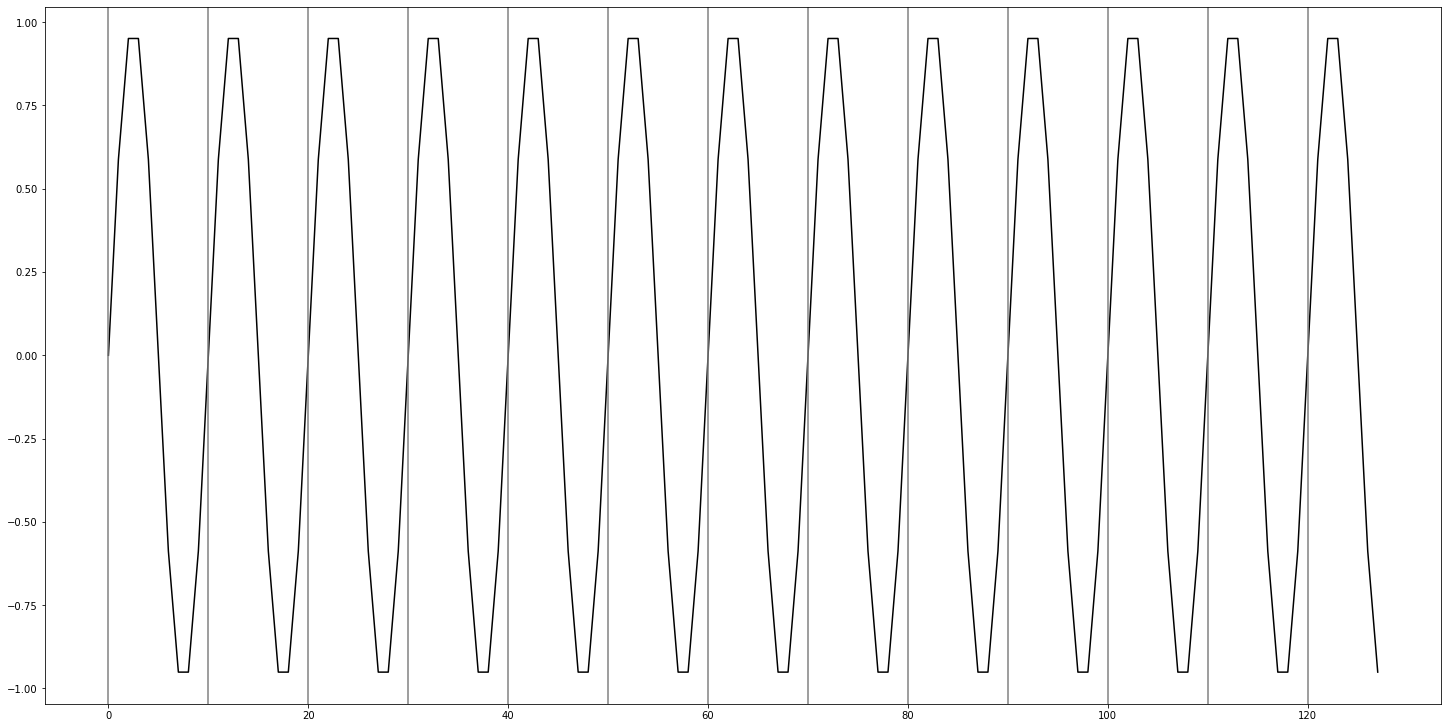

In [2]:
import numpy as np
from matplotlib import colors, ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.fft import dct

np.random.seed(256)  # for reproducibility

# create time steps and corresponding sine wave with Gaussian noise
fs = 10  # sampling rate, Hz
ts = np.arange(0, 12.8, 1.0 / fs)  # time vector - 8 seconds

ys = np.sin(2*np.pi * 1.0 * ts)  # signal @ 1.0 Hz, without noise
yerr = 0. * np.random.normal(size=len(ts))  # Gaussian noise
yraw = ys + yerr

nx = len(yraw)
print(nx)

fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(20,10))
ax.plot(yraw, color='k', linestyle='-')
for w in np.arange(0, nx-1, 10):
    ax.axvline(x = w, color = 'grey', label = 'axvline - full height')


In [3]:
print('YRAW mean:      ',yraw.mean())

print('YRAW variance:  ',yraw.var())

YRAW mean:       0.012022201317090824
YRAW variance:   0.4979023416754914


In [4]:
import scipy 

def dct_with_fft(x):
    N = x.size
    v = np.empty_like(x)
    v[:(N-1)//2+1] = x[::2]

    if N % 2: # odd length
        v[(N-1)//2+1:] = x[-2::-2]
    else: # even length
        v[(N-1)//2+1:] = x[::-2]

    V = scipy.fftpack.fft(v)

    k = np.arange(N)
    V *= 2 * np.exp(-1j*np.pi*k/(2*N))
    return V.real


0.49804687500000006


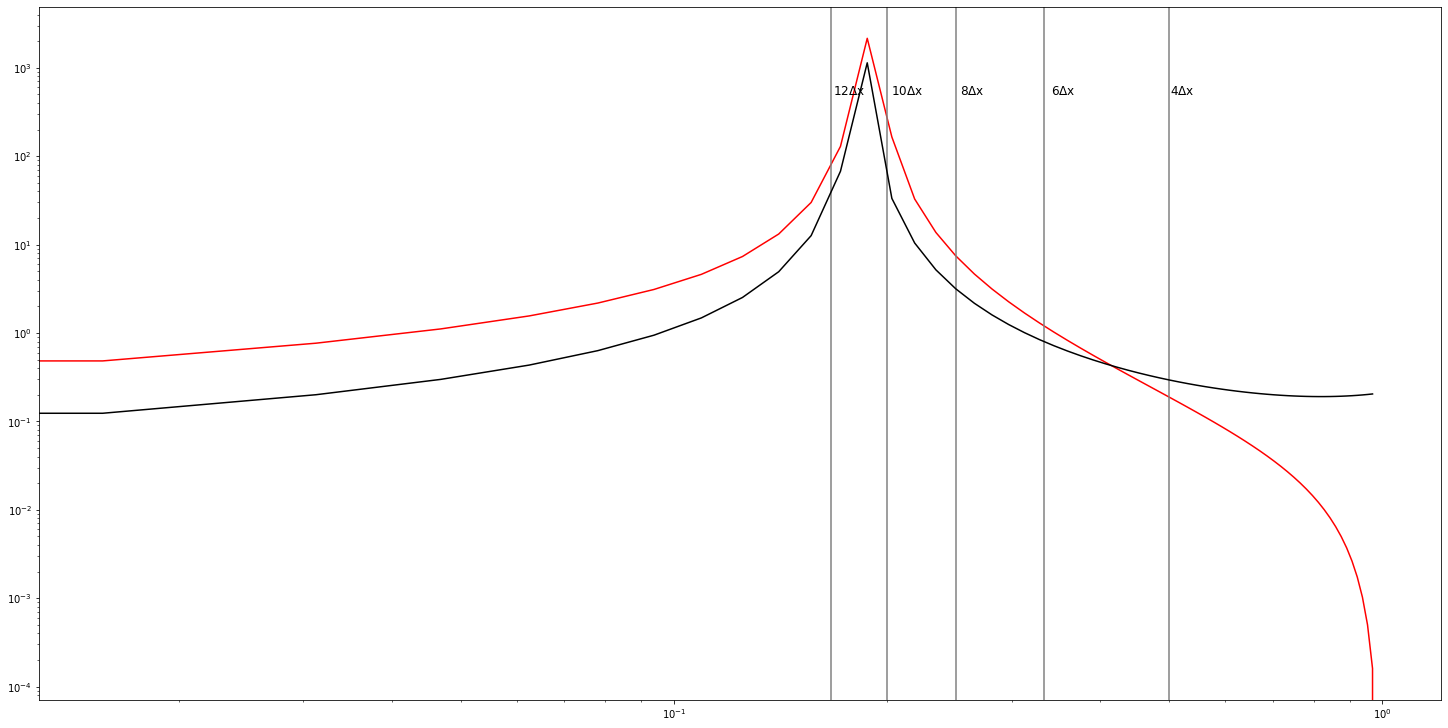

In [23]:
uh = dct(yraw, norm='ortho', type=2)

#uh = np.sqrt(1.0/nx) * dct_with_fft(yraw)

kbins = np.arange(0.5, nx//2+1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])

variance2 = 0.5*(uh**2)

variance3 = np.zeros((nx//2,))

for n in np.arange(1,nx//2):
    
    variance3[n-1] = variance2[2*n-1] + variance2[2*n]
    
# print(variance4[0:10], variance3[0:10])

# print(variance3.shape, wbins.shape)

print('DCT variance sum:  ', 2*variance3.sum()/float(nx))

PSbins, _, _ = stats.binned_statistic(kvals, variance3, statistic = "mean", bins = kbins)
PSbins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

wavenumber = 2*(kvals-1)/nx

fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(20,10))

ax.loglog(wavenumber, PSbins, color='r', linestyle='-')

ylabel = 5. * 100.

xoffset = [0.001, 0.0075, 0.0035, 0.0025, 0.001]

for n, w in enumerate([4.0, 6.0, 8.0, 10., 12.]):
    ax.axvline(x = 2.0/w, color = 'grey', label = 'axvline - full height')  
    ax.annotate(r"%d$\Delta$x" % w, xy=(2./w + xoffset[n], ylabel), xycoords='data', color='k',fontsize=12)
    

uh = np.fft.fftn(yraw, norm='ortho')

variance = 0.5*(uh*np.conj(uh)).real

print(print('DCT variance sum:  '2*variance.sum()/float(nx))
                                         
kfreq   = (np.fft.fftfreq(nx) * nx)

# print('kfreq ',kfreq)

# print('kbins ',kbins)

# print('kvals ',kvals)

PSbins, _, _ = stats.binned_statistic(kfreq, variance, statistic = "mean", bins = kbins)

PSbins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

ax.loglog(wavenumber, PSbins, color='k', linestyle='-')


